<a href="https://colab.research.google.com/github/TechJonesAi/ImageAi/blob/master/Copy_of_flowersclassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MUST FOLLOW THESE STEPS INITIATE RUNTIME GPU AND RUN . BELOW CELL**

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


**NAME IT AND SAVE MODEL TO GOOGLE DRIVE**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_drive = "/content/gdrive/My Drive/"
base_drive = root_drive + 'Flowers'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *

**RUN ONE BY ONE RUN GOLD FISH FIRST, THEN RUN PATH = PATH('/CONTENT/GDRIVE.... THEN RUN DOWNLOAD_IMAGES(PATH/FILE..... REPEAT PROCESS**

In [0]:
folder = 'Aconitum'
file = 'Aconitum.txt'

In [0]:
folder = 'Daffodil'
file = 'Daffodil.txt'

In [0]:
folder = 'Hibiscus'
file = 'Hibiscus.txt'

In [0]:
folder = 'Roses'
file = 'Roses.txt'

**NOW RUN THE THREE BOTTOM CELLS AND RETURN RETURN AND RUN THE OTHER CELLS ABOVE THEN RETURN TO THESE TWO CELLS BELOW IN THAT ORDER**

In [0]:
path = Path('//content/gdrive/My Drive/Colab Notebooks/Flowers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['Aconitum', 'Daffodil', 'Hibiscus', 'Roses']

In [0]:
download_images(path/file, dest, max_pics=200)

**NOW RUN THE BELOW CELL ONCE ALL THE CELLS ABOVE HAS RUN SUCCESSFULLY**

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

**REMOVE IMAGES THAT CAN'T OPEN OR CORRUPT**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['Aconitum', 'Daffodil', 'Hibiscus', 'Roses']

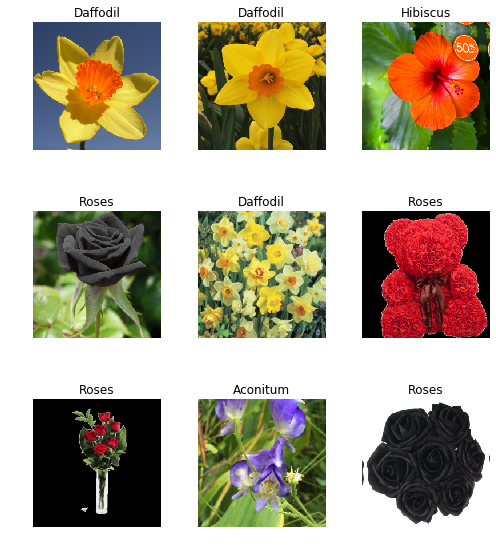

In [12]:
data.show_batch(rows=3, figsize=(7,8))

**VIsually Check Images**

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aconitum', 'Daffodil', 'Hibiscus', 'Roses'], 4, 608, 152)

**TRAIN MODEL**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.156674,0.378472,0.111842,00:39
1,0.652863,0.148193,0.052632,00:38
2,0.443707,0.116471,0.032895,00:39
3,0.334083,0.107961,0.026316,00:38


In [0]:
learn.save('stage-1')

In [17]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.096063,0.093189,0.026316,00:38
1,0.084191,0.085857,0.026316,00:39


In [0]:
learn.save('stage-2')

In [19]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.070749,0.074470,0.019737,00:41
1,0.071345,0.078554,0.019737,00:38


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


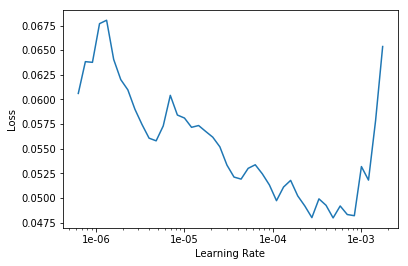

In [23]:
learn.recorder.plot()

**BASED ON THE GRAPH IT SHOWS IT STARTS TO FALL AT 3e-5, 3e-4 so we set that below**

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.102983,0.264495,0.078947,00:40
1,0.105280,0.052521,0.032895,00:40


In [0]:
learn.save('stage-3')

In [25]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.049691,0.034259,0.013158,00:38
1,0.035764,0.035811,0.013158,00:39


In [0]:
learn.save('stage-4')

**THAT LOOKS BETTER.... TRAINING ALL DONE**

In [0]:
learn.load('stage-4');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

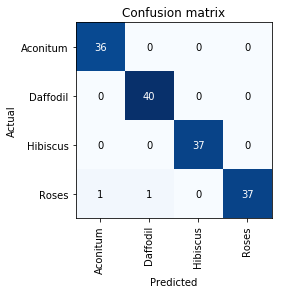

In [29]:
interp.plot_confusion_matrix()

**PREPARE FOR EXPORT**

**Predicted Right**

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

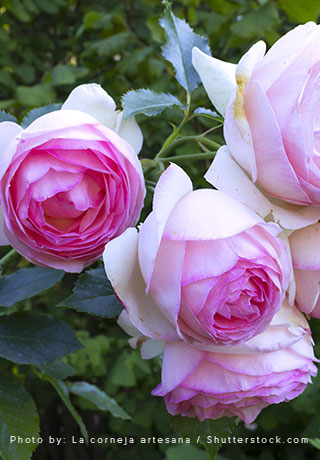

In [32]:
img = open_image(path/'Roses'/'00000199.jpg')
img

In [0]:
learn = load_learner(path)

In [34]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Roses